<a href="https://colab.research.google.com/github/Zahra-Aliyeva/Data-analysis/blob/main/Students_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/StudentsPerformance (1).csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [8]:
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.describe(include='O')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df['Total Score']=df['math score']+df['reading score']+df['writing score']
df['average score']=df['Total Score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
df['resualt']=(df['average score']>50).astype(int)
df['resualt']

,resualt
0,1
1,1
2,1
3,0
4,1
...,...
995,1
996,1
997,1
998,1


In [14]:
df['gender'].value_counts()

,count
gender,
female,518
male,482


In [15]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Total Score', 'average score', 'resualt'],
      dtype='object')

In [16]:
for col in ['gender','race/ethnicity','parental level of education','lunch','test preparation course']:
  print(df[col].value_counts())
  print()

gender
female    518
male      482
Name: count, dtype: int64

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

test preparation course
none         642
completed    358
Name: count, dtype: int64



In [17]:
df.groupby('gender')[['math score','reading score','writing score']].mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [18]:
df.groupby('lunch')[['math score','reading score','writing score']].mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [19]:
df.groupby('test preparation course')[['math score','reading score','writing score']].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [20]:
df[['math score','reading score','writing score']].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [21]:
reading_full=(df['reading score']==100).sum()
math_full=(df['math score']==100).sum()
writing_full=(df['writing score']==100).sum()

print(f'Readingda full alanlarin sayi: {reading_full}')
print(f'Mathda full alanlarin sayi: {math_full}')
print(f'Writing full alanlarin sayi: {writing_full}')

Readingda full alanlarin sayi: 17
Mathda full alanlarin sayi: 7
Writing full alanlarin sayi: 14


In [22]:
reading_less_20=(df['reading score']<20).sum()
math_less_20=(df['math score']<20).sum()
writing_less_20=(df['writing score']<20).sum()

print(f'Readingda 20den az alanlarin sayi: {reading_less_20}')
print(f'Mathda 20den az alanlarin sayi: {math_less_20}')
print(f'Writing 20den az  alanlarin sayi: {writing_less_20}')

Readingda 20den az alanlarin sayi: 1
Mathda 20den az alanlarin sayi: 4
Writing 20den az  alanlarin sayi: 3


In [23]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Total Score', 'average score', 'resualt'],
      dtype='object')

In [24]:
df['resualt'].value_counts()

,count
resualt,
1,891
0,109


In [25]:
num_master=((df['average score']>df['average score'].mean())&(df['parental level of education']=="master's degree")).sum()
num_master

np.int64(39)

In [26]:
high_avg=df[df['average score']>df['average score'].mean()].groupby('parental level of education').size().reset_index()
high_avg

,parental level of education,0
0,associate's degree,128
1,bachelor's degree,73
2,high school,79
3,master's degree,39
4,some college,122
5,some high school,85


#Visualization


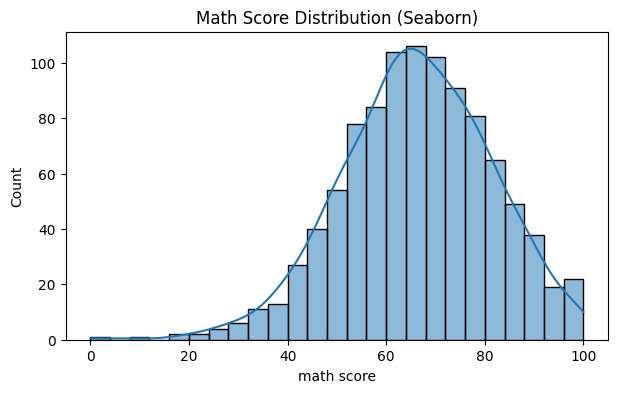

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
sns.histplot(df['math score'], kde=True)
plt.title("Math Score Distribution (Seaborn)")
plt.show()


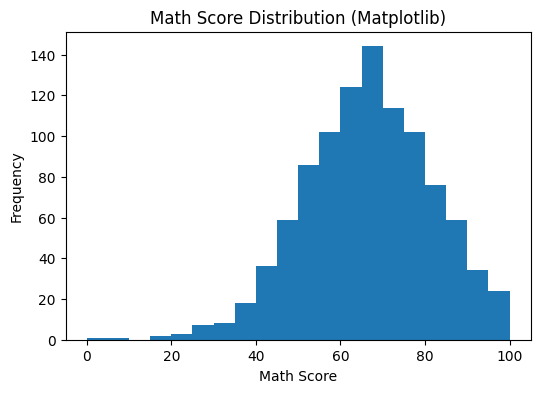

In [28]:
plt.figure(figsize=(6,4))
plt.hist(df['math score'], bins=20)
plt.title("Math Score Distribution (Matplotlib)")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.show()


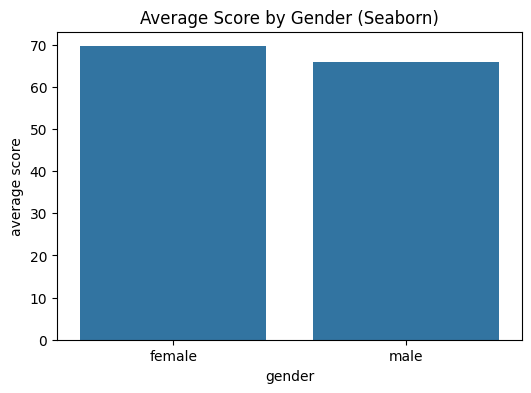

In [29]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='gender', y='average score',errorbar=None)
plt.title("Average Score by Gender (Seaborn)")
plt.show()


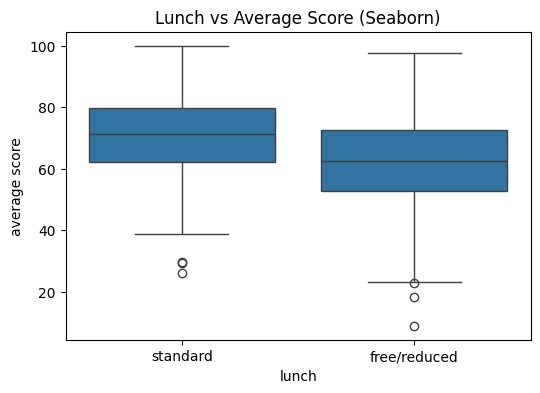

In [30]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='lunch', y='average score')
plt.title("Lunch vs Average Score (Seaborn)")
plt.show()

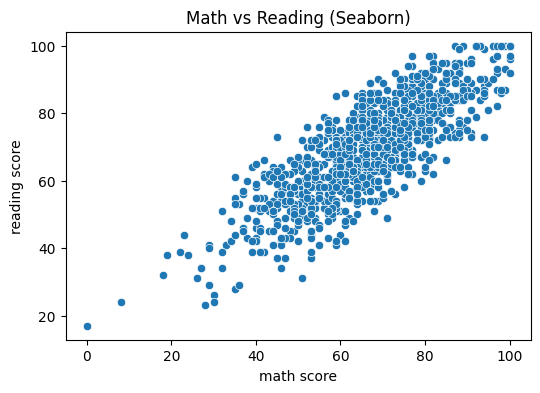

In [31]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='math score', y='reading score')
plt.title("Math vs Reading (Seaborn)")
plt.show()


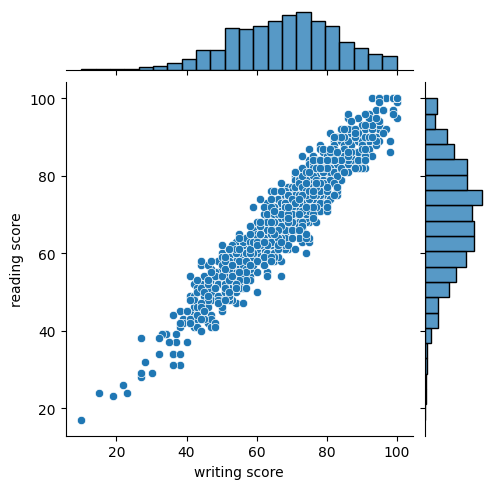

In [32]:
sns.jointplot(
    data=df,
    x='writing score',
    y='reading score',
    kind='scatter',   # scatter + yuxarı/sağ histogramlar
    height=5
);


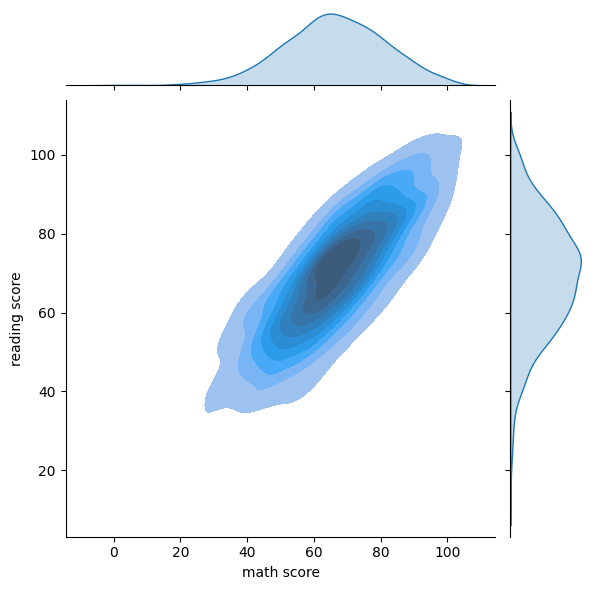

In [33]:
sns.jointplot(
    data=df,
    x='math score',
    y='reading score',
    kind='kde',
    fill=True,
    height=6
)


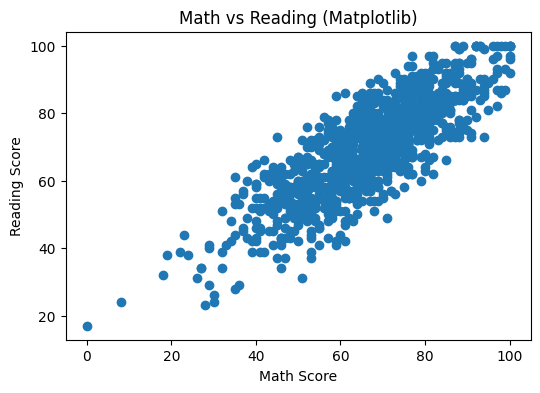

In [34]:
plt.figure(figsize=(6,4))
plt.scatter(df['math score'], df['reading score'])
plt.title("Math vs Reading (Matplotlib)")
plt.xlabel("Math Score")
plt.ylabel("Reading Score")
plt.show()


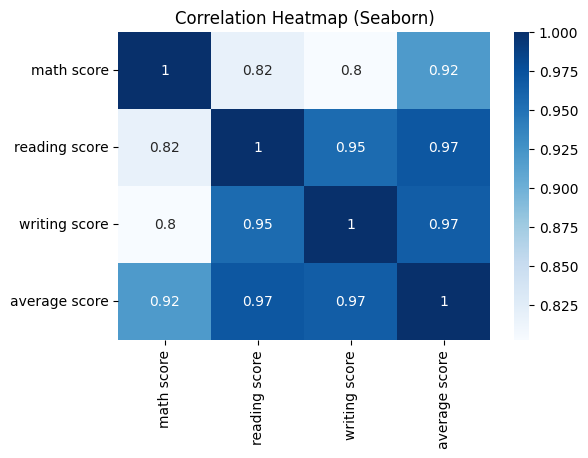

In [35]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['math score','reading score','writing score','average score']].corr(),
            annot=True, cmap='Blues')
plt.title("Correlation Heatmap (Seaborn)")
plt.show()


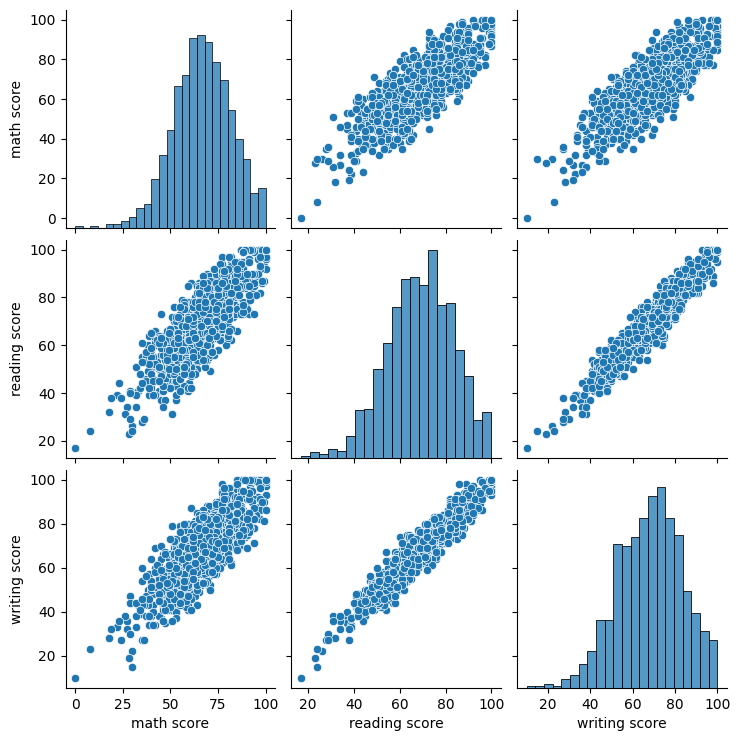

In [36]:
sns.pairplot(df[['math score','reading score','writing score']])
plt.show()


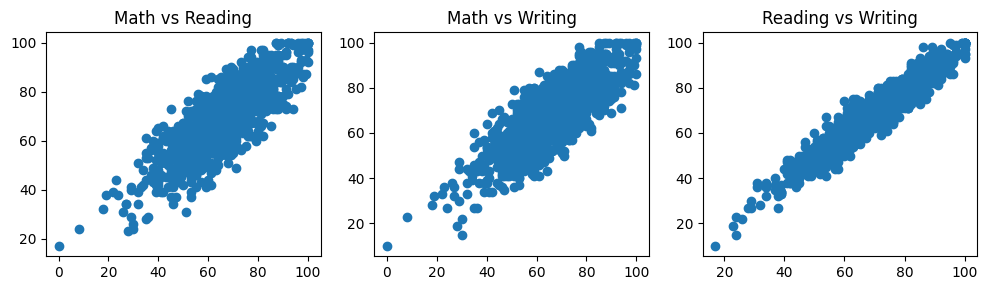

In [37]:
plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
plt.scatter(df['math score'], df['reading score'])
plt.title("Math vs Reading")

plt.subplot(1,3,2)
plt.scatter(df['math score'], df['writing score'])
plt.title("Math vs Writing")

plt.subplot(1,3,3)
plt.scatter(df['reading score'], df['writing score'])
plt.title("Reading vs Writing")

plt.tight_layout()
plt.show()


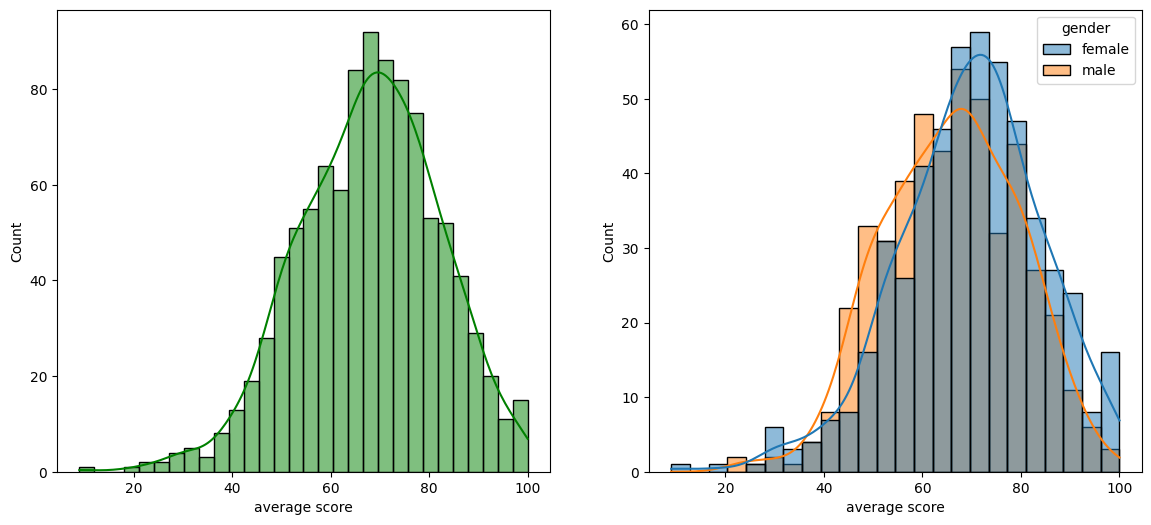

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
plt.subplot(121)
sns.histplot(data=df,x='average score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average score',kde=True,hue='gender')
plt.show()

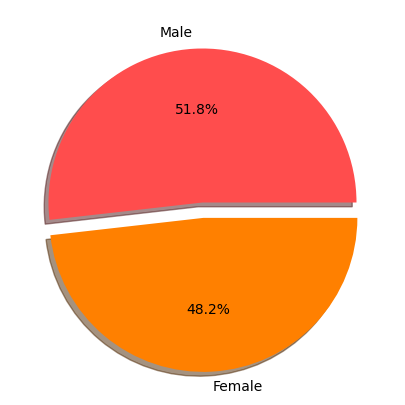

In [39]:
plt.figure(figsize=(10,5))
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [40]:
race_counts = df['race/ethnicity'].value_counts()
race_counts

,count
race/ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


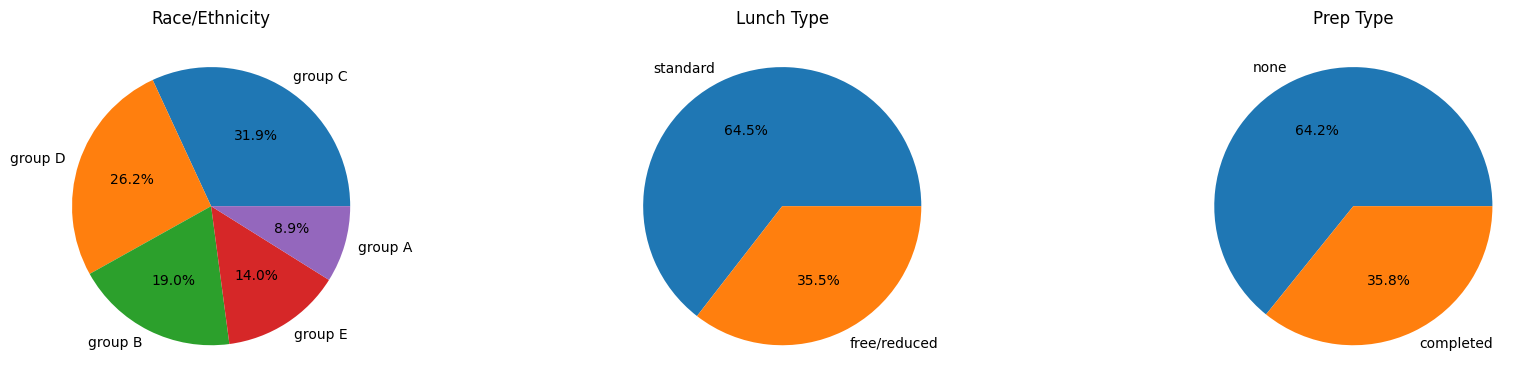

In [41]:
race_counts = df['race/ethnicity'].value_counts()
lunch_counts = df['lunch'].value_counts()
prep_counts = df['test preparation course'].value_counts()

# Figure
plt.figure(figsize=(18, 4))


plt.subplot(1, 3, 1)
plt.pie(race_counts, labels=race_counts.index, autopct="%1.1f%%")
plt.title("Race/Ethnicity")


plt.subplot(1, 3, 2)
plt.pie(lunch_counts, labels=lunch_counts.index, autopct="%1.1f%%")
plt.title("Lunch Type")


plt.subplot(1, 3, 3)
plt.pie(prep_counts, labels=prep_counts.index, autopct="%1.1f%%")
plt.title("Prep Type")

plt.tight_layout()
plt.show()


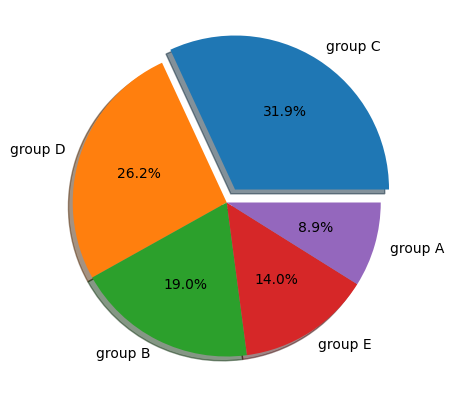

In [42]:
plt.figure(figsize=(10,5))
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

/tmp/ipython-input-1637156009.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'tab10',ax=ax[1])
/tmp/ipython-input-1637156009.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'tab10',ax=ax[2])


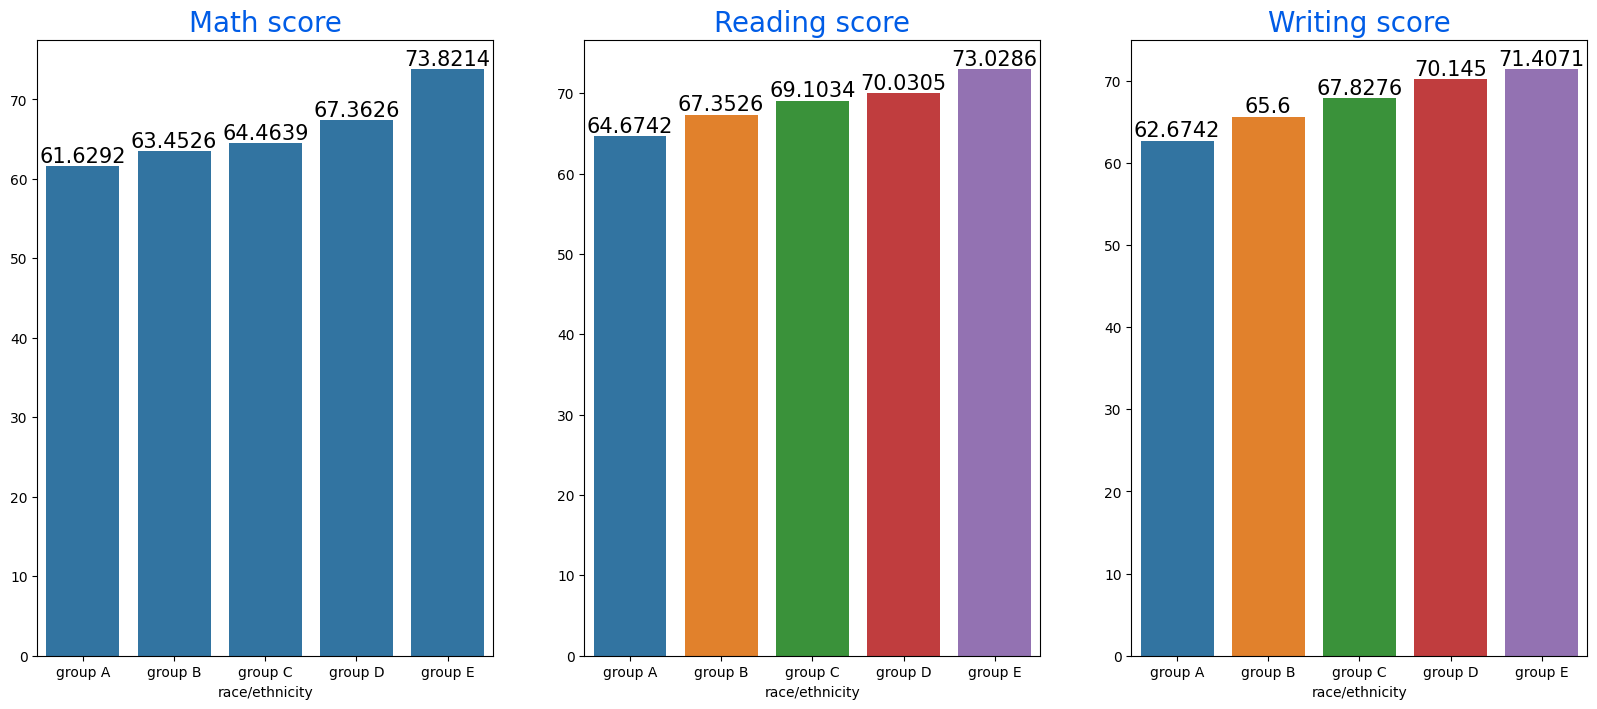

In [43]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'tab10',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'tab10',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

In [44]:
 means =df.groupby('race/ethnicity')['math score'].mean()
 means

,math score
race/ethnicity,
group A,61.629213
group B,63.452632
group C,64.463950
group D,67.362595
group E,73.821429


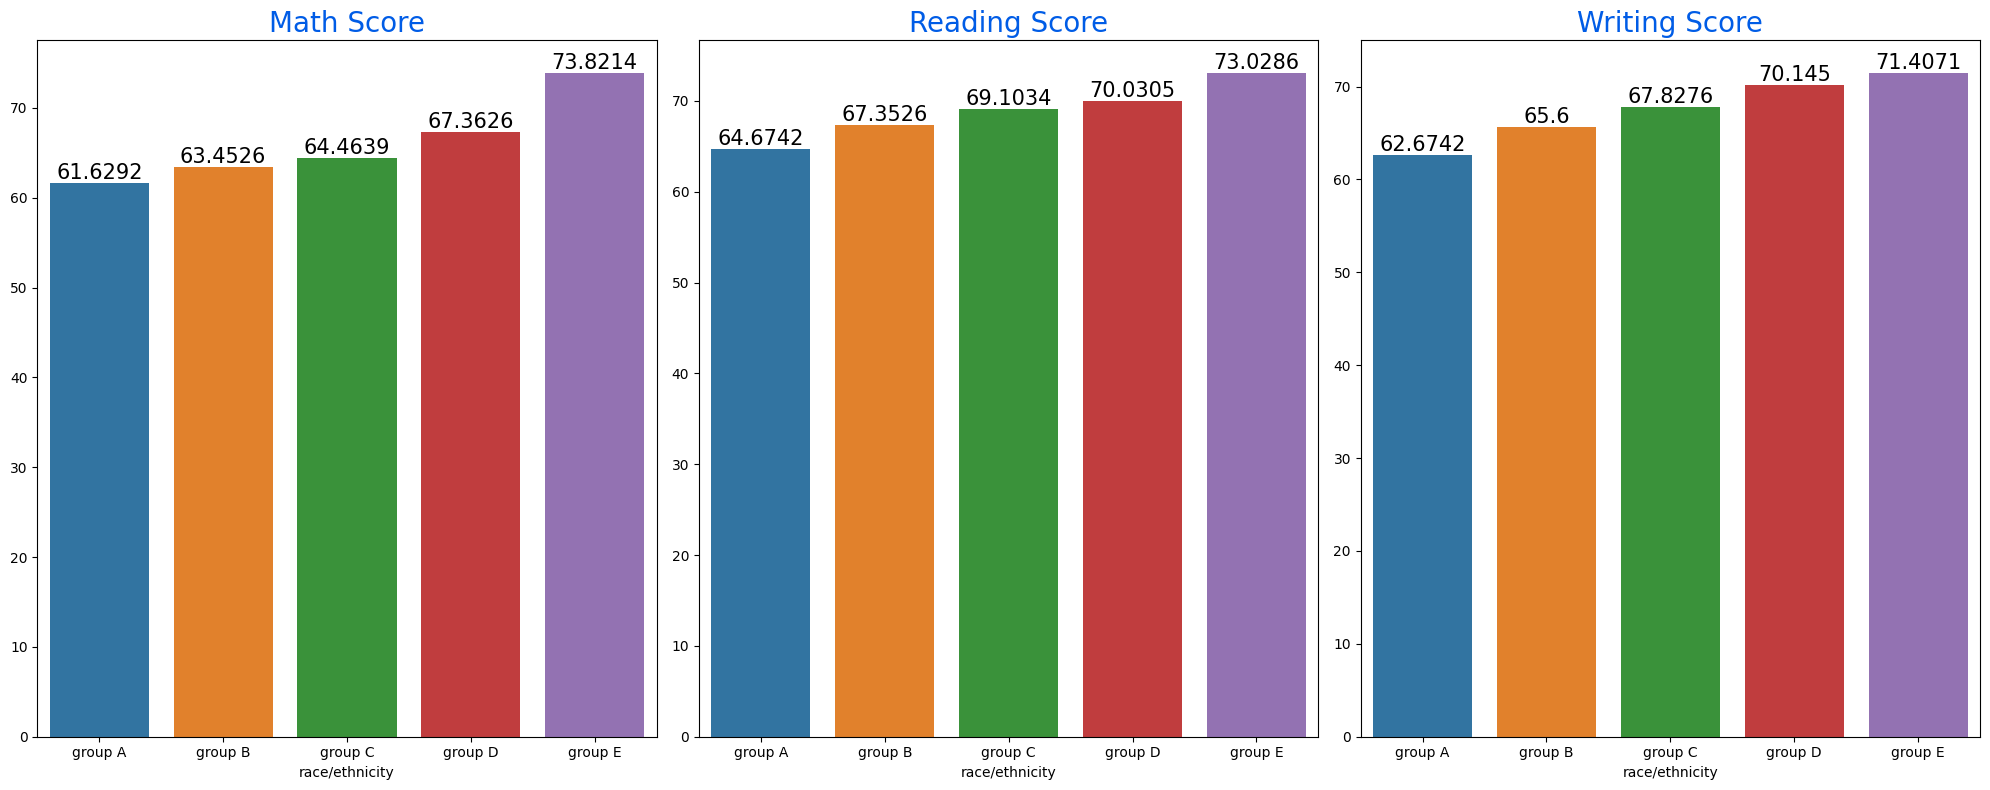

In [45]:
cols = ['math score', 'reading score', 'writing score']
Group_data2=df.groupby('race/ethnicity')

f, ax = plt.subplots(1, 3, figsize=(20,8))

for i, col in enumerate(cols):
    means = Group_data2[col].mean()

    sns.barplot(
        x=means.index,
        y=means.values,
        hue=means.index,
        palette='tab10',
        legend=False,
        ax=ax[i]
    )

    ax[i].set_title(f'{col.title()}', color='#005ce6', size=20)

    for container in ax[i].containers:
        ax[i].bar_label(container, color='black', size=15)

plt.tight_layout()
plt.show()


In [46]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Total Score', 'average score', 'resualt'],
      dtype='object')

/tmp/ipython-input-3991534374.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['parental level of education'], palette = 'Blues',hue=None,legend=False)


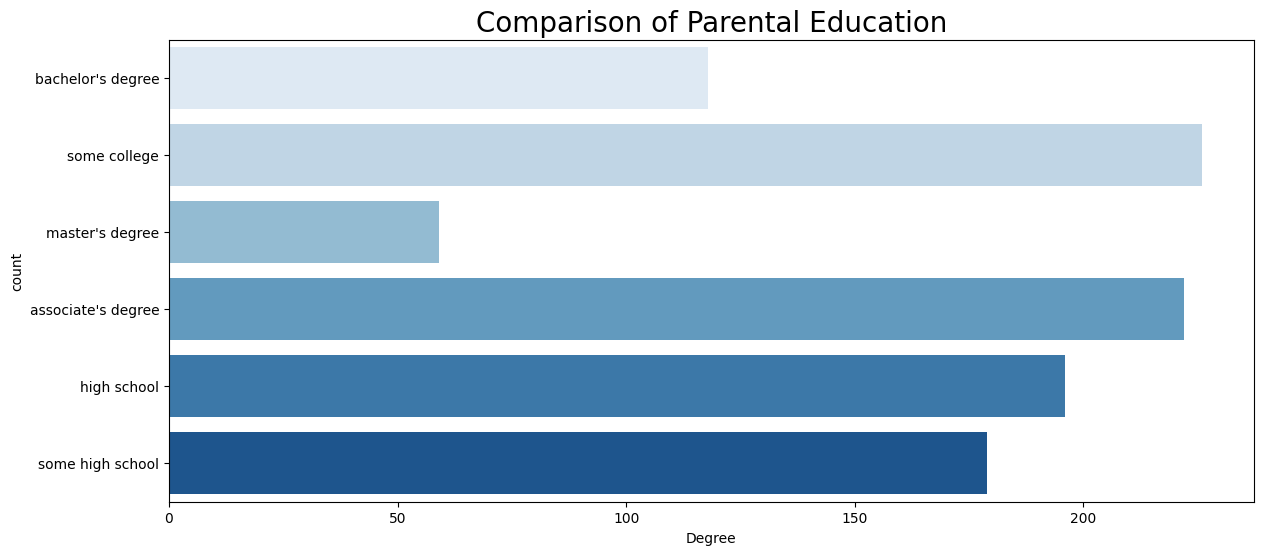

In [47]:
plt.figure(figsize=(14, 6))
sns.countplot(df['parental level of education'], palette = 'Blues',hue=None,legend=False)
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

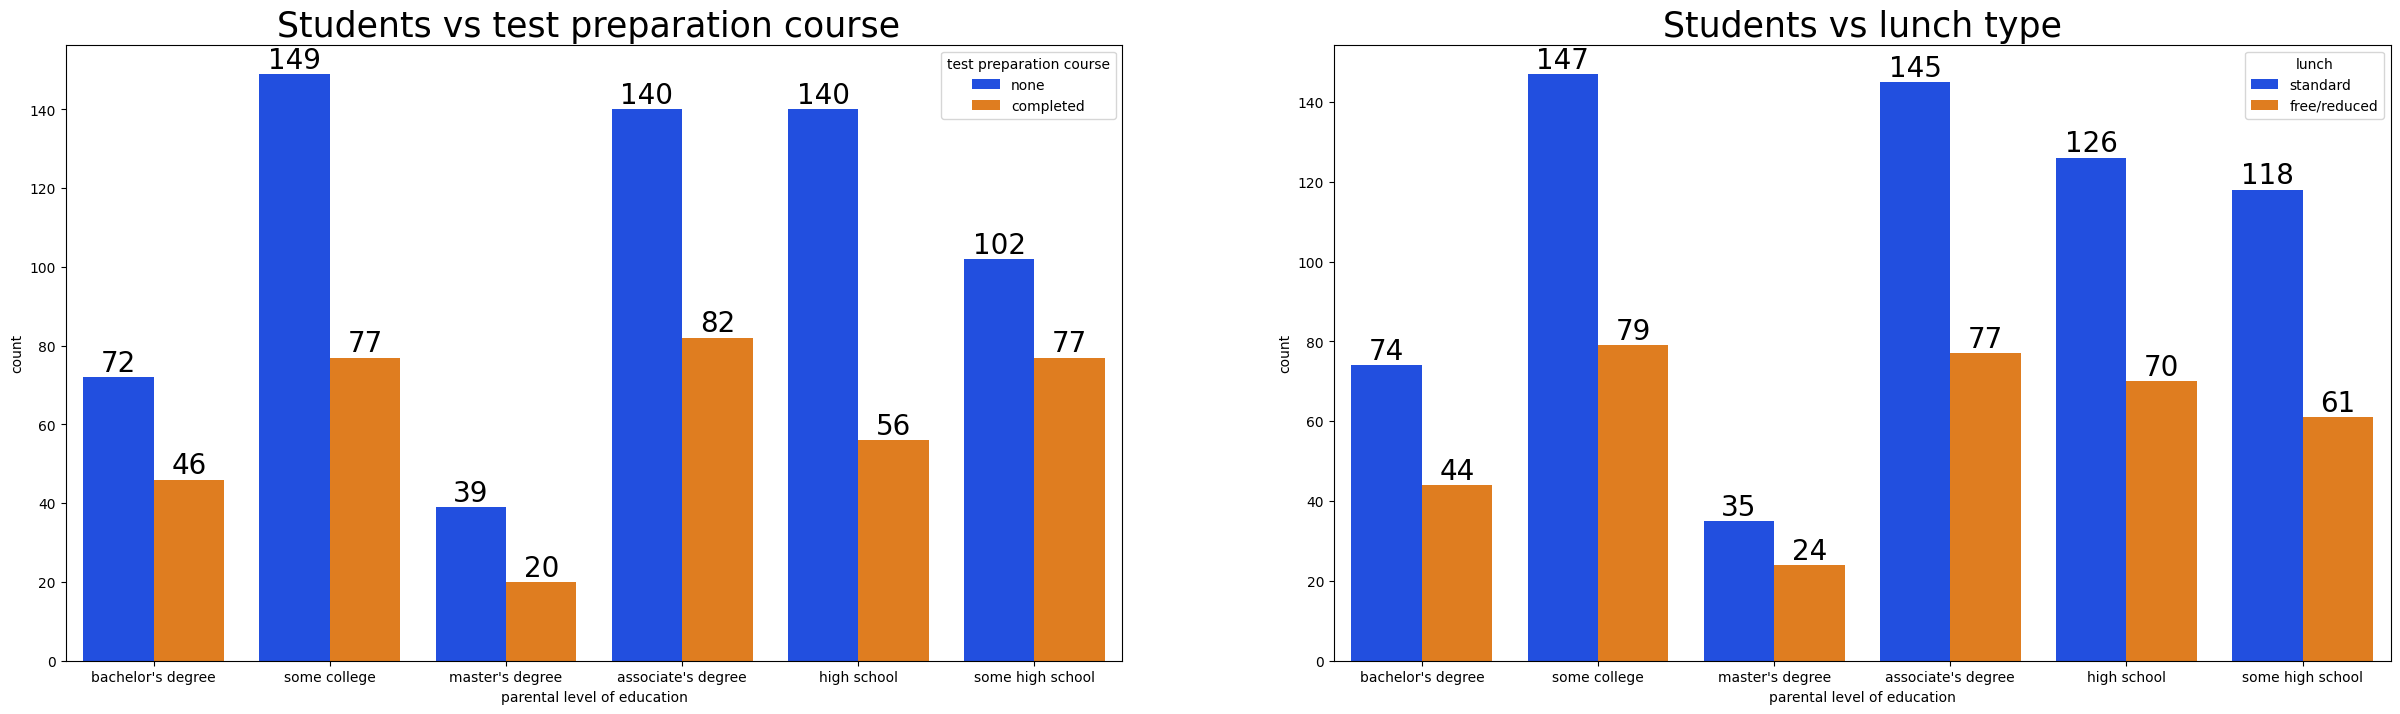

In [48]:
f,ax=plt.subplots(1,2,figsize=(30,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',ax=ax[1])
ax[1].set_title('Students vs lunch type',color='black',size=25)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)